# Training a deep neural network to detect disease

In this workshop, we will train a deep neural network to identify metastatic cancer in small image patches taken from larger digital pathology scans (an on-going [Kaggle](https://www.kaggle.com/c/histopathologic-cancer-detection) competition).

In [6]:
from pathlib import Path
import fastai
import fastai.vision as vision

## Fastai

Load and inspect the data in the ./data folder

You will notice that the images are split into two folders: normal and tumour. Below we will view some of these images alongside their labels, to get an idea of what our classifier is trying to learn.

We will use FastAi's ImageDataBunch to load our data, and to perform our transforms

In [10]:
# set the path to the data
path = Path("./data")

In [11]:
# set the transforms
transforms = vision.get_transforms()
# import the data
data = vision.ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=transforms,
                                  size=224, num_workers=0)

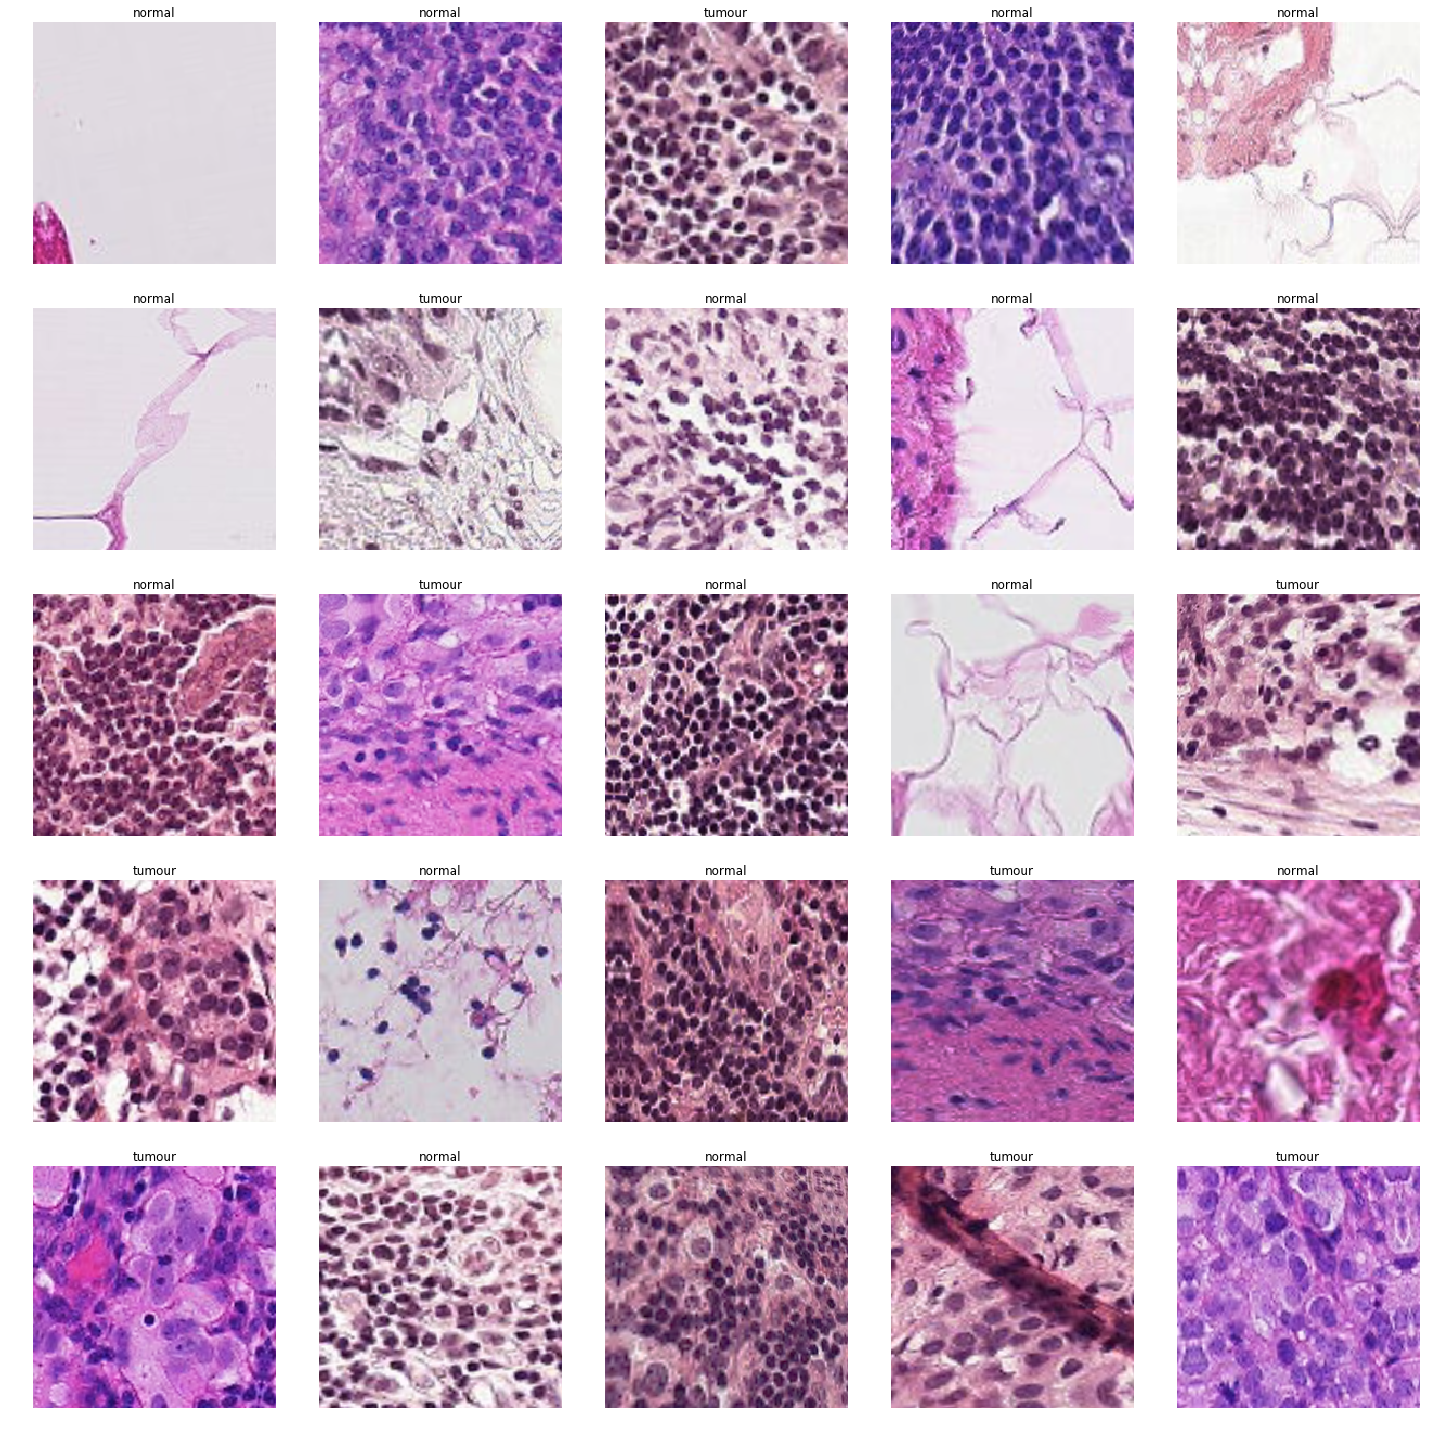

In [12]:
# show a batch of data
data.show_batch()

## Train the model

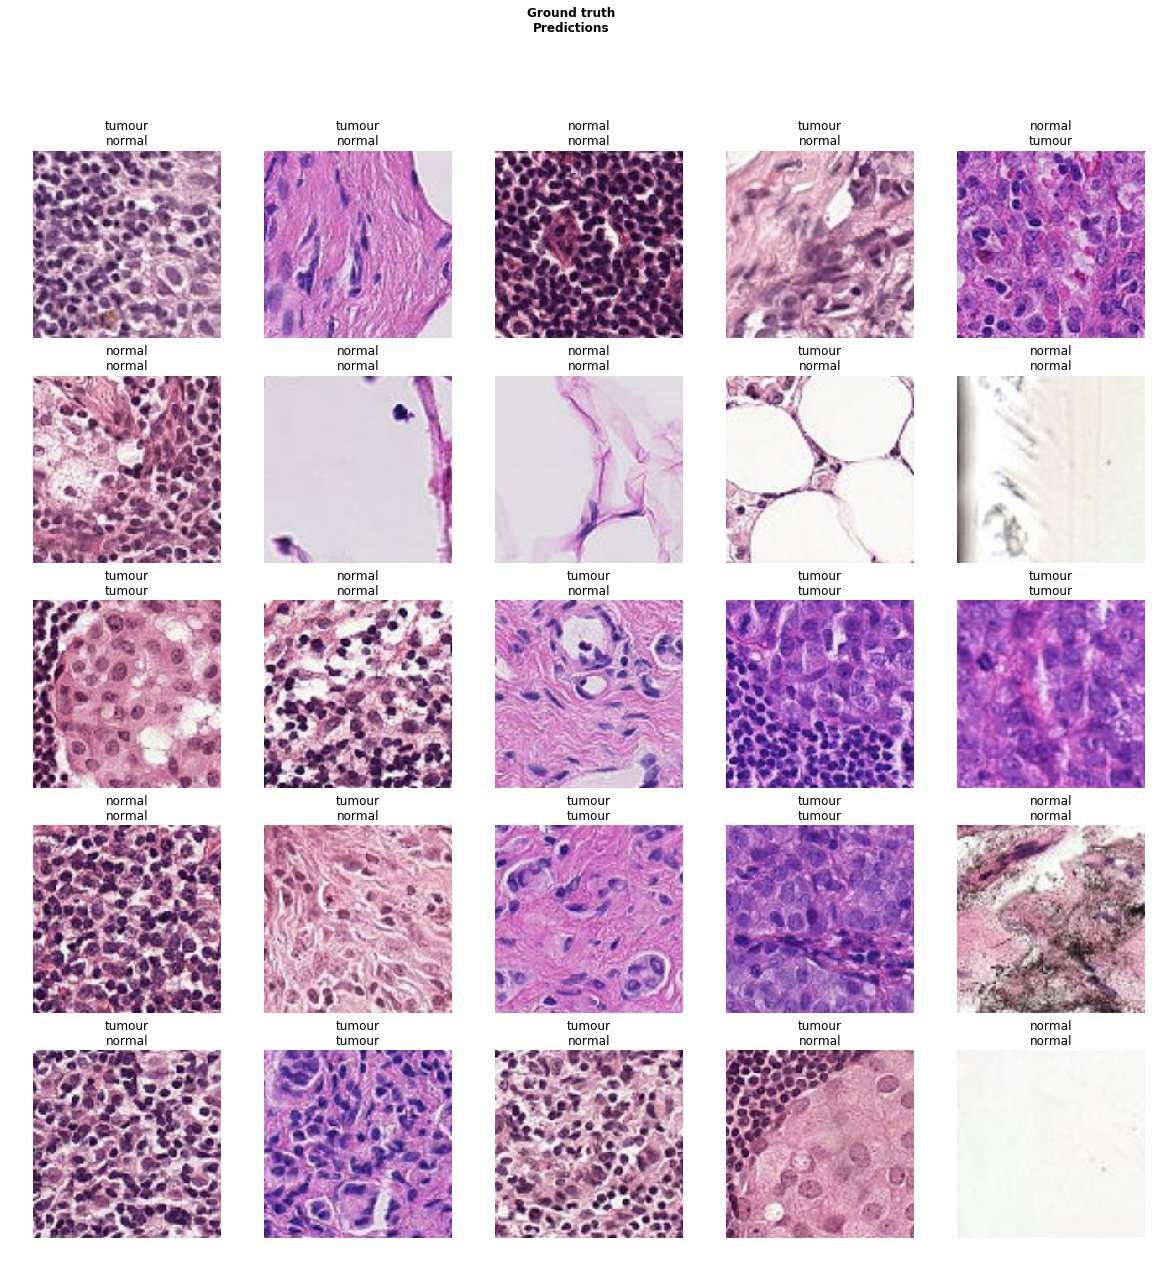

In [13]:
# create the CNN learner
learn = vision.cnn_learner(data, vision.models.resnet18, metrics=[vision.error_rate, vision.accuracy])
# fit the model to the data!
learn.fit(epochs=1)
# show the results
learn.show_results()

# Confusion matrix

Darker square where the model makes more correct predictions

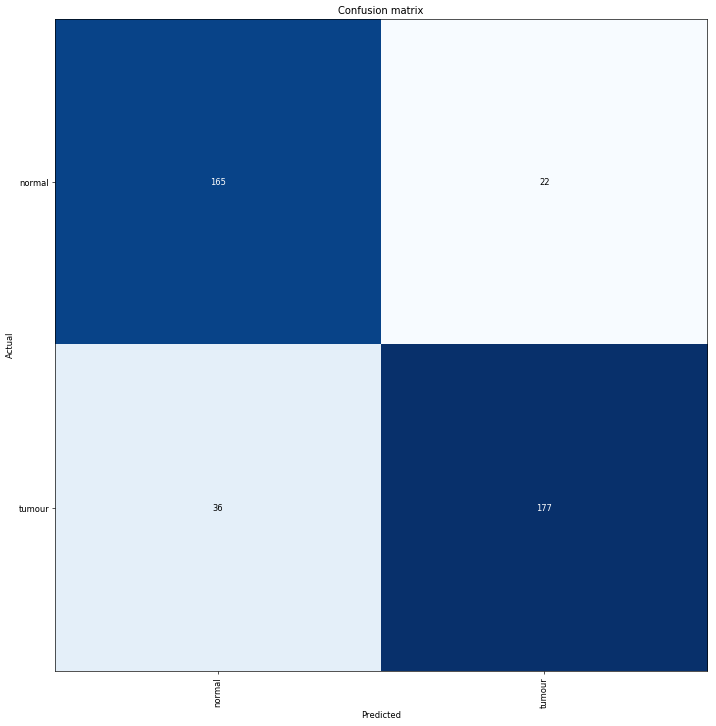

In [13]:
# create the confusion matrix

interp = vision.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Extensions
- Train for 2 epoch 
- Plot the training loss with the line `learn.record.plot()`
- Change the model to resnet34
- Print the precision and recall 